### Import Libraries 

In [163]:
# Libraries for data manipulation
import json
from pandas import json_normalize
from pandas import read_csv
import pandas as pd
import numpy as np

# Libraries for visualization
from matplotlib import pyplot as plt
import seaborn as sns

# ML models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier



# Evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc




### Import and Transform the json profiles into a dataframe of feature vectors

In [164]:
customer_file = 'data/customers.json'
df = pd.read_json(customer_file, lines= True)
df

,fraudulent,customer,orders,paymentMethods,transactions
0,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...","[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...","[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."
2,False,"{'customerEmail': 'andersonwilliam@yahoo.com',...","[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3..."
3,False,"{'customerEmail': 'rubenjuarez@yahoo.com', 'cu...","[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz..."
4,True,"{'customerEmail': 'uchen@malone.com', 'custome...","[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h..."
...,...,...,...,...,...
163,True,{'customerEmail': 'mitchellvickie@brewer-jones...,"[{'orderId': '6086rd', 'orderAmount': 31, 'ord...","[{'paymentMethodId': 'x644o186l', 'paymentMeth...","[{'transactionId': 'ryxa1mzn', 'orderId': '608..."
164,True,"{'customerEmail': 'sbrown@hughes.biz', 'custom...","[{'orderId': '57yhdo', 'orderAmount': 30, 'ord...","[{'paymentMethodId': 'wsy5c41nf', 'paymentMeth...","[{'transactionId': '293g6767', 'orderId': '57y..."
165,True,"{'customerEmail': 'johnlowery@gmail.com', 'cus...","[{'orderId': 'vcyuse', 'orderAmount': 35, 'ord...","[{'paymentMethodId': 'j3foo2l16', 'paymentMeth...","[{'transactionId': 'qio8vvq7', 'orderId': 'vcy..."
166,True,{'customerEmail': 'ethompson@jackson-sanders.c...,"[{'orderId': '9s9ne9', 'orderAmount': 49, 'ord...","[{'paymentMethodId': 'b3jl38c9g', 'paymentMeth...","[{'transactionId': '1uusmhj9', 'orderId': '9s9..."


In [165]:
df_exp= df.explode('orders').explode('paymentMethods').explode('transactions').reset_index().rename(columns={'index':'customerId'})
df_exp = pd.json_normalize(json.loads(df_exp.to_json(orient='records'))).drop(columns=['orders','transactions','paymentMethods'])
df_exp


,customerId,fraudulent,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress,orders.orderId,orders.orderAmount,orders.orderState,...,paymentMethods.paymentMethodId,paymentMethods.paymentMethodRegistrationFailure,paymentMethods.paymentMethodType,paymentMethods.paymentMethodProvider,paymentMethods.paymentMethodIssuer,transactions.transactionId,transactions.orderId,transactions.paymentMethodId,transactions.transactionAmount,transactions.transactionFailed
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18.0,pending,...,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,a9lcj51r,vjbdvd,wt07xm68b,18.0,False
1,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18.0,pending,...,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,y4wcv03i,yp6x27,wt07xm68b,26.0,False
2,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26.0,fulfilled,...,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,a9lcj51r,vjbdvd,wt07xm68b,18.0,False
3,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26.0,fulfilled,...,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,y4wcv03i,yp6x27,wt07xm68b,26.0,False
4,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,nlghpa,45.0,fulfilled,...,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks,5mi94sfw,nlghpa,41ug157xz,45.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,167,False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",5lmvrj,27.0,fulfilled,...,rh7676yct,True,apple pay,VISA 13 digit,Citizens First Banks,7yilsi1o,1bubxa,7yen1m1q8,25.0,True
6576,167,False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",5lmvrj,27.0,fulfilled,...,rh7676yct,True,apple pay,VISA 13 digit,Citizens First Banks,wmh52bns,1bubxa,3zmkegkb8,25.0,True
6577,167,False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",5lmvrj,27.0,fulfilled,...,rh7676yct,True,apple pay,VISA 13 digit,Citizens First Banks,c82k5bcv,1bubxa,7yen1m1q8,25.0,False
6578,167,False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",5lmvrj,27.0,fulfilled,...,rh7676yct,True,apple pay,VISA 13 digit,Citizens First Banks,xdw33hfp,p0gdbf,3zmkegkb8,19.0,False


### Exploratory Data Analysis

#### Fraud Rate Analysis

In [166]:
df_exp.customerId.nunique()

168

In [167]:
fraud_rate = df.fraudulent.mean().round(3)
print("{:.2%}".format(fraud_rate)+" of customers are classified as fraudulent.")

36.30% of customers are classified as fraudulent.


c:\Users\wefistore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


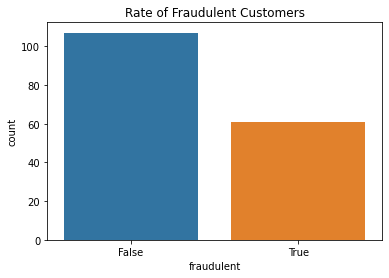

In [168]:
sns.countplot(df['fraudulent'])
plt.title("Rate of Fraudulent Customers")
plt.show()

#### Order Analysis

In [169]:
orders = df[['fraudulent','customer','orders']]
orders = orders.explode('orders').reset_index().rename(columns={'index':'customerId'})
orders = pd.json_normalize(json.loads(orders.to_json(orient='records'))).drop(columns=['orders'])

orders

,customerId,fraudulent,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress,orders.orderId,orders.orderAmount,orders.orderState,orders.orderShippingAddress
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18.0,pending,"5493 Jones Islands\nBrownside, CA 51896"
1,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26.0,fulfilled,"5493 Jones Islands\nBrownside, CA 51896"
2,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,nlghpa,45.0,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497"
3,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,uw0eeb,23.0,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
4,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,bn44oh,43.0,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801"
...,...,...,...,...,...,...,...,...,...,...,...
500,167,False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",ow1cih,23.0,fulfilled,"130 Kimberly Junctions\nEricmouth, KS 59756-2919"
501,167,False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",ak5a9n,32.0,fulfilled,"750 Sarah Stream\nAndersonfurt, WI 68970"
502,167,False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",1bubxa,25.0,fulfilled,"130 Kimberly Junctions\nEricmouth, KS 59756-2919"
503,167,False,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",p0gdbf,19.0,fulfilled,"130 Kimberly Junctions\nEricmouth, KS 59756-2919"


In [170]:
# checking the num of orders per customer
num_orders = orders.groupby('customerId').agg({'orders.orderId':'count'})
num_orders

,orders.orderId
customerId,
0,2
1,3
2,3
3,3
4,7
...,...
163,3
164,5
165,4


In [171]:
orders_genuine = orders[orders['fraudulent']==False].groupby('customerId').agg({'orders.orderId':'count'})
orders_fraud = orders[orders['fraudulent']==True].groupby('customerId').agg({'orders.orderId':'count'})


Text(0.5, 0, 'Count of orders per Customer')

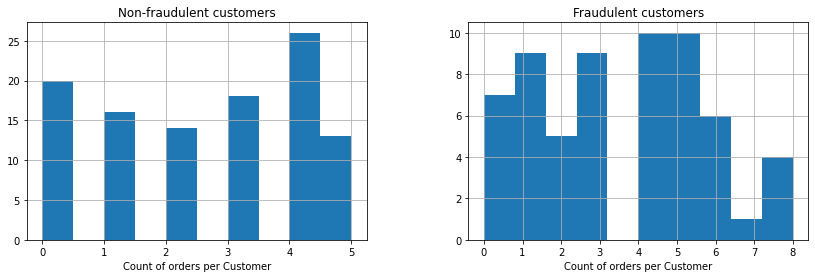

In [172]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
orders_genuine.hist(ax=ax[0])
ax[0].set_title('Non-fraudulent customers')
ax[0].set_xlabel('Count of orders per Customer')
orders_fraud.hist(ax=ax[1])
ax[1].set_title('Fraudulent customers')
ax[1].set_xlabel('Count of orders per Customer')

Comparing the number of orders fraudulent customers made and the number of orders that non fraudulent customers made, we can notice 
a higher number of orders for fraudulent customers. The number of orders per customer will be used as a feature for modelling.

Text(0.5, 0, 'Order Amounts')

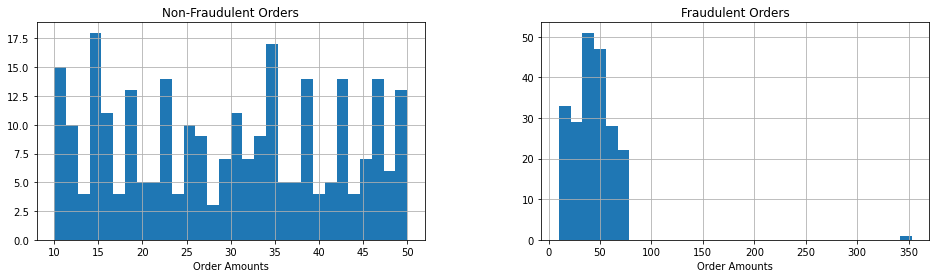

In [173]:
# Checking the distribution of the amount of orders in each class
fig, ax = plt.subplots(1,2, figsize=(16,4))
orders[orders.fraudulent == False].hist('orders.orderAmount', bins=30, ax=ax[0])
orders[orders.fraudulent == True].hist('orders.orderAmount', bins=30, ax=ax[1])
ax[0].set_title('Non-Fraudulent Orders')
ax[0].set_xlabel('Order Amounts')
ax[1].set_title('Fraudulent Orders')
ax[1].set_xlabel('Order Amounts')

The order amounts placed by Fraudulent customers is much larger. In fact, the amount ordered in non-fraudulent orders is usually less than 50 units. However, fradulent orders concern orders with 50 or more units.



In [174]:
# the avg and max qnd total of order amounts per customer can be useful feature for model training later 
order_amount = orders.groupby('customerId').agg({'orders.orderAmount':[np.average,np.max,np.sum]}).droplevel(0, axis=1)
order_amount.rename(columns={'average':'OrderAmount_avg','amax':'OrderAmount_max','sum':'OrderAmount_sum'}, inplace=True)
order_amount.head()

,OrderAmount_avg,OrderAmount_max,OrderAmount_sum
customerId,,,
0,22.000000,26.0,44.0
1,37.000000,45.0,111.0
2,27.333333,33.0,82.0
3,28.333333,34.0,85.0
4,58.714286,71.0,411.0


In [175]:
orders.groupby(['orders.orderState','fraudulent']).agg({'orders.orderId':'count','orders.orderAmount':'sum',})

orders.orderId  orders.orderAmount
orders.orderState fraudulent                                    
failed            False                   27               837.0
                  True                    23               986.0
fulfilled         False                  223              6486.0
                  True                   177              7712.0
pending           False                   17               517.0
                  True                    11               482.0

The count of orderID per orderState is almost the same for both Fraudulent and non-Fraudulent customers. Therefore, the OrderState feature doesn't seem to be a good indicator of whether a placed order is fraudulent or not.

In [176]:
orders['sameAsBilling'] = orders.apply(lambda x: True if (x['customer.customerBillingAddress']==x['orders.orderShippingAddress']) else False, axis=1)
orders.groupby(['sameAsBilling','fraudulent']).agg({'orders.orderId':'count','orders.orderAmount':'sum'})

orders.orderId  orders.orderAmount
sameAsBilling fraudulent                                    
False         False                   69              1965.0
              True                    81              3402.0
True          False                  198              5875.0
              True                   130              5778.0

Whether or not the customer billing address was the same as order shipping address doesn't seem to be a good predictor of Fraud.


### Payment Analysis

In [177]:
payment = df[['fraudulent','customer','paymentMethods']]
payment = payment.explode('paymentMethods').reset_index().rename(columns={'index':'customerId'})
payment = pd.json_normalize(json.loads(payment.to_json(orient='records'))).drop(columns=['paymentMethods'])

payment.head()

,customerId,fraudulent,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress,paymentMethods.paymentMethodId,paymentMethods.paymentMethodRegistrationFailure,paymentMethods.paymentMethodType,paymentMethods.paymentMethodProvider,paymentMethods.paymentMethodIssuer
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks
1,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks
2,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp
3,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.
4,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,m52tx8e1s,False,card,Mastercard,Vertex Bancorp


Text(0.5, 1.0, 'Fraudulent orders')

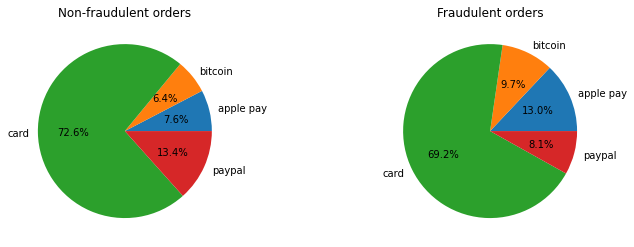

In [178]:
payment_genuine = payment[payment['fraudulent'] == False]
payment_fraud = payment[payment['fraudulent'] == True]

fig, ax = plt.subplots(1,2,figsize=(12,4))
payment_method = payment_genuine.groupby('paymentMethods.paymentMethodType').agg({'paymentMethods.paymentMethodId':'count'})
ax[0].pie(payment_method['paymentMethods.paymentMethodId'], labels=payment_method.index, autopct='%1.1f%%')
ax[0].set_title('Non-fraudulent orders')
method = payment_fraud.groupby('paymentMethods.paymentMethodType').agg({'paymentMethods.paymentMethodId':'count'})
ax[1].pie(method['paymentMethods.paymentMethodId'], labels=method.index, autopct='%1.1f%%')
ax[1].set_title('Fraudulent orders')

Payment by card is the most common payment method among the two classes of customers (fraudulent and non-fraudulent). However, the payment method feature doesn't seem to reveal much about whether a customer is fraudulent or not.

In [179]:
payment_fraud.groupby(['fraudulent','paymentMethods.paymentMethodIssuer']).agg({'paymentMethods.paymentMethodId':'count'})

paymentMethods.paymentMethodId
fraudulent paymentMethods.paymentMethodIssuer                                
True                                                                        2
           B                                                                7
           Bastion Banks                                                   17
           Bulwark Trust Corp.                                             15
           Citizens First Banks                                            14
           Fountain Financial Inc.                                         21
           Grand Credit Corporation                                        10
           Her Majesty Trust                                               19
           His Majesty Bank Corp.                                          17
           Rose Bancshares                                                 12
           Solace Banks                                                    12
           Vertex Bancorp                                                  19
           a                                                                1
           c                                                                4
           e                                                                5
           n                                                                2
           o                                                                2
           p                                                                1
           r                                                                3
           x                                                                2

In [180]:
payment_genuine.groupby(['fraudulent','paymentMethods.paymentMethodIssuer']).agg({'paymentMethods.paymentMethodId':'count'})

paymentMethods.paymentMethodId
fraudulent paymentMethods.paymentMethodIssuer                                
False      Bastion Banks                                                   12
           Bulwark Trust Corp.                                             14
           Citizens First Banks                                            14
           Fountain Financial Inc.                                         14
           Grand Credit Corporation                                        17
           Her Majesty Trust                                               24
           His Majesty Bank Corp.                                          16
           Rose Bancshares                                                 13
           Solace Banks                                                    15
           Vertex Bancorp                                                  18

From the above, we can see that the paymentMethodIssuer for fraudulent transactions seems to be invalid. In fact, we can create a list of legitimate payment method issuers to flag the payments with incorrect or fake issuer details.

In [181]:
genuine_issuer_list = payment_genuine['paymentMethods.paymentMethodIssuer'].dropna().unique()
payment['validIssuer'] = payment['paymentMethods.paymentMethodIssuer'].isin(genuine_issuer_list)
valid_payment = payment[payment['validIssuer']==False].groupby('customerId').agg({'paymentMethods.paymentMethodId':'count'})
valid_payment.rename(columns={'paymentMethods.paymentMethodId':'num_invalidIssuer'}, inplace=True)
valid_payment.head()

,num_invalidIssuer
customerId,
5,2
6,2
10,1
15,1
23,1


Text(0.5, 0, 'No. Payment Methods')

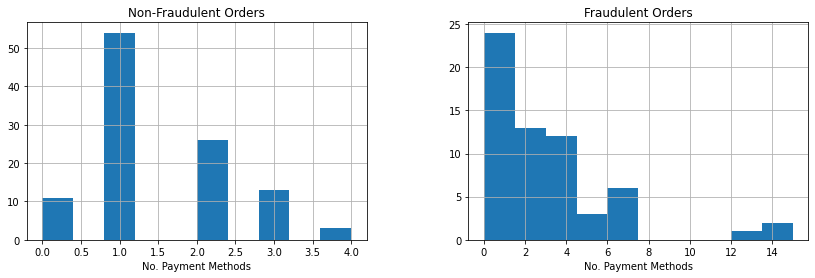

In [182]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
payment_genuine.groupby('customerId').agg({'paymentMethods.paymentMethodId':pd.Series.nunique}).hist(ax=ax[0])
payment_fraud.groupby('customerId').agg({'paymentMethods.paymentMethodId':pd.Series.nunique}).hist(ax=ax[1])
ax[0].set_title('Non-Fraudulent Orders')
ax[0].set_xlabel('No. Payment Methods')
ax[1].set_title('Fraudulent Orders')
ax[1].set_xlabel('No. Payment Methods')


There is a correlation between Fraudulence and having a higher number of payment methods per customer. In fact, we can see the majority of customers in the Non-Fraudulent class use one or two payment methods for their transactions. On the otehr hand, Fraudulent customers tend to use up to 14 payment methods. Therfore, the count of the unique payment methods for each customern can be a useful feature for modelling.

In [183]:
payment_methods = payment.groupby('customerId').agg({'paymentMethods.paymentMethodId':pd.Series.nunique})
payment_methods.rename({'paymentMethods.paymentMethodId':'num_paymentmethods'}, inplace=True)

### Transactions Analysis

In [184]:
transactions = df[['fraudulent','customer','transactions']]
transactions = transactions.explode('transactions').reset_index().rename(columns={'index':'customerId'})
transactions = pd.json_normalize(json.loads(transactions.to_json(orient='records'))).drop(columns=['transactions'])
transactions.head()

,customerId,fraudulent,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress,transactions.transactionId,transactions.orderId,transactions.paymentMethodId,transactions.transactionAmount,transactions.transactionFailed
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",a9lcj51r,vjbdvd,wt07xm68b,18.0,False
1,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",y4wcv03i,yp6x27,wt07xm68b,26.0,False
2,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,5mi94sfw,nlghpa,41ug157xz,45.0,False
3,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,br8ba1nu,uw0eeb,41ug157xz,23.0,False
4,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,a33145ss,bn44oh,y3xp697jx,43.0,True


In [185]:
transactions.groupby(['transactions.transactionFailed','fraudulent']).agg({'transactions.transactionId':'count', 'transactions.transactionAmount':'sum'})

transactions.transactionId  \
transactions.transactionFailed fraudulent                               
False                          False                              258   
                               True                               197   
True                           False                              108   
                               True                                60   

                                           transactions.transactionAmount  
transactions.transactionFailed fraudulent                                  
False                          False                               7560.0  
                               True                                8169.0  
True                           False                               3072.0  
                               True                                2754.0

In [186]:
num_failed_transaction = transactions[transactions['transactions.transactionFailed']==True].groupby(['customerId']).agg({'transactions.transactionId':'count'})
num_failed_transaction.rename(columns={'transactions.transactionId':'num_failedtransaction'}, inplace=True)
num_failed_transaction.head()

,num_failedtransaction
customerId,
1,1
2,2
4,2
6,1
7,2


In [187]:
transactions_genuine = transactions[transactions['fraudulent']==False].groupby('customerId').agg({'transactions.transactionId':'count'})
transactions_fraud = transactions[transactions['fraudulent']==True].groupby('customerId').agg({'transactions.transactionId':'count'})

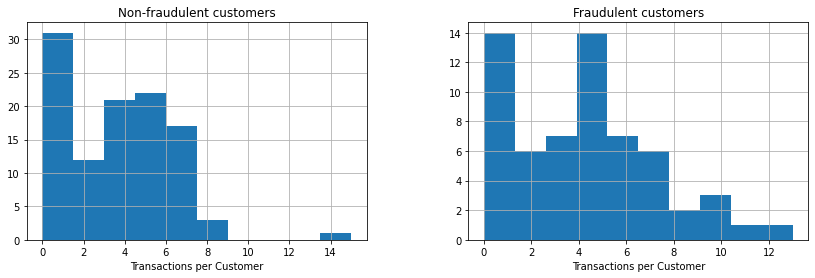

In [188]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
transactions_genuine.hist(ax=ax[0])
ax[0].set_title('Non-fraudulent customers')
ax[0].set_xlabel('Transactions per Customer')
transactions_fraud.hist(ax=ax[1])
ax[1].set_title('Fraudulent customers')
ax[1].set_xlabel('Transactions per Customer');

In [189]:
num_transactions = transactions.groupby('customerId').agg({'transactions.transactionId':'count'})

### Feature Engineering

In [190]:
features = df_exp[['fraudulent','customerId']].drop_duplicates('customerId', ignore_index=True)
features.head()

,fraudulent,customerId
0,False,0
1,True,1
2,False,2
3,False,3
4,True,4


In [191]:
features = features.join(num_orders, on='customerId').join(num_transactions, on='customerId')
features.rename(columns={'orders.orderId':'num_orders','transactions.transactionId':'num_transactions'}, inplace=True)
features.head()

,fraudulent,customerId,num_orders,num_transactions
0,False,0,2,2
1,True,1,3,3
2,False,2,3,5
3,False,3,3,3
4,True,4,7,7


In [192]:
features = features.join(order_amount, on='customerId')
features[['OrderAmount_avg','OrderAmount_max','OrderAmount_sum']] = features[['OrderAmount_avg','OrderAmount_max','OrderAmount_sum']].fillna(0)
features.head()

,fraudulent,customerId,num_orders,num_transactions,OrderAmount_avg,OrderAmount_max,OrderAmount_sum
0,False,0,2,2,22.000000,26.0,44.0
1,True,1,3,3,37.000000,45.0,111.0
2,False,2,3,5,27.333333,33.0,82.0
3,False,3,3,3,28.333333,34.0,85.0
4,True,4,7,7,58.714286,71.0,411.0


In [193]:
features = features.join(payment_methods, on='customerId').rename(columns={'paymentMethods.paymentMethodId':'num_paymentmethods'})
features.head()

,fraudulent,customerId,num_orders,num_transactions,OrderAmount_avg,OrderAmount_max,OrderAmount_sum,num_paymentmethods
0,False,0,2,2,22.000000,26.0,44.0,1
1,True,1,3,3,37.000000,45.0,111.0,7
2,False,2,3,5,27.333333,33.0,82.0,2
3,False,3,3,3,28.333333,34.0,85.0,1
4,True,4,7,7,58.714286,71.0,411.0,6


In [194]:
features = features.join(valid_payment, on='customerId')
features.num_invalidIssuer = features.num_invalidIssuer.fillna(0)
features.head()

,fraudulent,customerId,num_orders,num_transactions,OrderAmount_avg,OrderAmount_max,OrderAmount_sum,num_paymentmethods,num_invalidIssuer
0,False,0,2,2,22.000000,26.0,44.0,1,0.0
1,True,1,3,3,37.000000,45.0,111.0,7,0.0
2,False,2,3,5,27.333333,33.0,82.0,2,0.0
3,False,3,3,3,28.333333,34.0,85.0,1,0.0
4,True,4,7,7,58.714286,71.0,411.0,6,0.0


In [195]:
features = features.join(num_failed_transaction, on='customerId')
features.num_failedtransaction = features.num_failedtransaction.fillna(0)
features.head()

,fraudulent,customerId,num_orders,num_transactions,OrderAmount_avg,OrderAmount_max,OrderAmount_sum,num_paymentmethods,num_invalidIssuer,num_failedtransaction
0,False,0,2,2,22.000000,26.0,44.0,1,0.0,0.0
1,True,1,3,3,37.000000,45.0,111.0,7,0.0,1.0
2,False,2,3,5,27.333333,33.0,82.0,2,0.0,2.0
3,False,3,3,3,28.333333,34.0,85.0,1,0.0,0.0
4,True,4,7,7,58.714286,71.0,411.0,6,0.0,2.0


In [196]:
y, X = features.pop('fraudulent'), features.drop(columns='customerId')

In [197]:
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### ML modelling


The go-to method for binary classification problems is logistic regression. It is named for the function used at the core of the method, the logistic function or also called sigmoiud function. we will train the model and see how the evaluation metrics look like, then we will train more sophisticated models like a tree based algorithm and a boosted version a decision tree.

In [198]:
lrcv = LogisticRegressionCV(max_iter=10000)
lrcv.fit(X_train_scaled, y_train)
print(lrcv.score(X_test_scaled, y_test))
print(lrcv.C_)

0.8571428571428571
[166.81005372]


In [199]:
lrcv_coefficients = pd.DataFrame(lrcv.coef_,
                                 columns=X.columns,
                                 index=['coefficients']).T.sort_values('coefficients',ascending=False)
lrcv_coefficients

,coefficients
num_invalidIssuer,4.788171
OrderAmount_sum,3.632715
OrderAmount_max,3.300016
num_paymentmethods,1.196452
num_failedtransaction,0.474024
num_transactions,-1.282456
num_orders,-2.378061
OrderAmount_avg,-3.312614


The most important features in this model are :

- num_invalidIssuer	
- OrderAmount_sum	
- OrderAmount_max
- num_paymentmethods

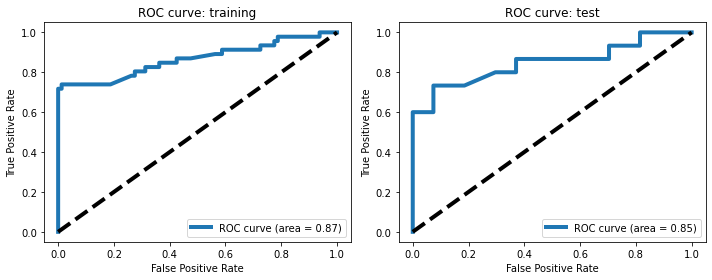

In [200]:

# ROC curve: training
y_pp = pd.DataFrame(lrcv.predict_proba(X_train_scaled), columns=['class_0_pp', 'class_1_pp'])
fpr, tpr, threshold = roc_curve(y_train, y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
ax[0].plot([0, 1], [0, 1], 'k--', linewidth=4)
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc="lower right")
ax[0].set_title('ROC curve: training')

# ROC Curve: test
y_pp = pd.DataFrame(lrcv.predict_proba(X_test_scaled), columns=['class_0_pp', 'class_1_pp'])
fpr, tpr, threshold = roc_curve(y_test, y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

ax[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
ax[1].plot([0, 1], [0, 1], 'k--', linewidth=4)
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc="lower right")
ax[1].set_title('ROC curve: test')

plt.tight_layout()

In [201]:
print(classification_report(y_test, lrcv.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        27
           1       1.00      0.60      0.75        15

    accuracy                           0.86        42
   macro avg       0.91      0.80      0.82        42
weighted avg       0.88      0.86      0.85        42



In [202]:
dt = DecisionTreeClassifier()
params = {'max_depth': range(2,10)}

gs_dt = GridSearchCV(dt, params)
gs_dt.fit(X_train_scaled, y_train)
print(gs_dt.best_params_)
print(gs_dt.best_score_)

{'max_depth': 3}
0.8723076923076922


In [203]:
ft_importance = pd.DataFrame(gs_dt.best_estimator_.feature_importances_,
                               index=X.columns,
                                  columns=['coefficients']).sort_values('coefficients',ascending=False)
ft_importance 

,coefficients
num_invalidIssuer,0.400336
OrderAmount_avg,0.390668
num_paymentmethods,0.156653
OrderAmount_max,0.052343
num_orders,0.000000
num_transactions,0.000000
OrderAmount_sum,0.000000
num_failedtransaction,0.000000


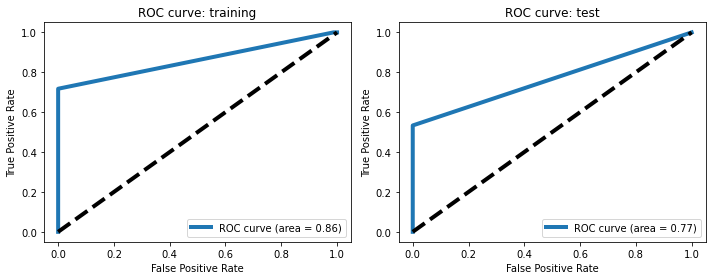

In [204]:
# ROC curve: training
y_pp = pd.DataFrame(gs_dt.predict_proba(X_train_scaled), columns=['class_0_pp', 'class_1_pp'])
fpr, tpr, threshold = roc_curve(y_train, y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
ax[0].plot([0, 1], [0, 1], 'k--', linewidth=4)
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc="lower right")
ax[0].set_title('ROC curve: training')

# ROC Curve: test
y_pp = pd.DataFrame(gs_dt.predict_proba(X_test_scaled), columns=['class_0_pp', 'class_1_pp'])
fpr, tpr, threshold = roc_curve(y_test, y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

ax[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
ax[1].plot([0, 1], [0, 1], 'k--', linewidth=4)
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc="lower right")
ax[1].set_title('ROC curve: test')

plt.tight_layout();

In [205]:
print(classification_report(y_test, gs_dt.predict(X_test_scaled)))


              precision    recall  f1-score   support

           0       0.79      1.00      0.89        27
           1       1.00      0.53      0.70        15

    accuracy                           0.83        42
   macro avg       0.90      0.77      0.79        42
weighted avg       0.87      0.83      0.82        42



In [206]:
gb = GradientBoostingClassifier()
params = {'learning_rate': np.linspace(.01,0.1,4),
          'max_depth': range(2,5)}

gs_gb = GridSearchCV(gb, params)
gs_gb.fit(X_train_scaled, y_train)
print(gs_gb.best_params_)
print(gs_gb.best_score_)

{'learning_rate': 0.04, 'max_depth': 3}
0.8563076923076922


In [207]:
gs_gb_importance = pd.DataFrame(gs_gb.best_estimator_.feature_importances_,
                                  index=X.columns,
                                  columns=['coefficients']).sort_values('coefficients',ascending=False)
gs_gb_importance

,coefficients
num_invalidIssuer,0.326370
OrderAmount_avg,0.304974
num_paymentmethods,0.156216
OrderAmount_max,0.104957
OrderAmount_sum,0.056389
num_transactions,0.017196
num_failedtransaction,0.017173
num_orders,0.016725


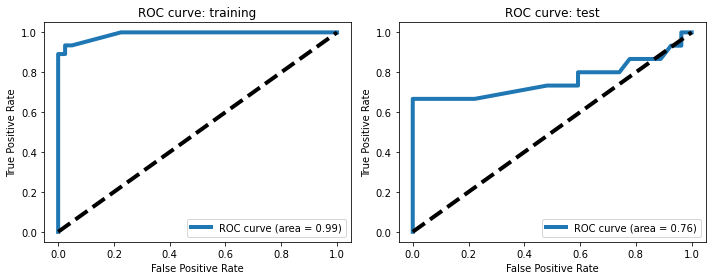

In [208]:
# ROC curve: training
y_pp = pd.DataFrame(gs_gb.predict_proba(X_train_scaled), columns=['class_0_pp', 'class_1_pp'])
fpr, tpr, threshold = roc_curve(y_train, y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
ax[0].plot([0, 1], [0, 1], 'k--', linewidth=4)
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc="lower right")
ax[0].set_title('ROC curve: training')

# ROC Curve: test
y_pp = pd.DataFrame(gs_gb.predict_proba(X_test_scaled), columns=['class_0_pp', 'class_1_pp'])
fpr, tpr, threshold = roc_curve(y_test, y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

ax[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
ax[1].plot([0, 1], [0, 1], 'k--', linewidth=4)
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc="lower right")
ax[1].set_title('ROC curve: test')

plt.tight_layout()

In [209]:
print(classification_report(y_test, gs_gb.best_estimator_.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92        27
           1       1.00      0.67      0.80        15

    accuracy                           0.88        42
   macro avg       0.92      0.83      0.86        42
weighted avg       0.90      0.88      0.87        42



Text(0.5, 1.0, 'Confusion Matrix')

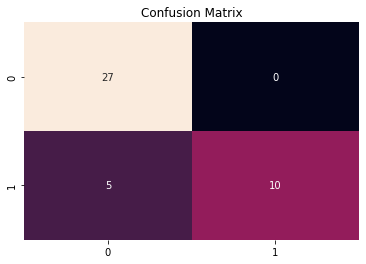

In [210]:
# Visualise confusion matrix:
cm = confusion_matrix(y_test, gs_gb.best_estimator_.predict(X_test_scaled))
classes = gs_gb.best_estimator_.classes_

sns.heatmap(pd.DataFrame(cm, index=classes, columns=classes), annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')

In [211]:
predict = pd.DataFrame(gs_gb.best_estimator_.predict(X_test_scaled), columns=['predict'])
predict['actual'] = y_test
predict['result'] = predict.apply(lambda x: x['predict']==x['actual'], axis=1)
predict = pd.concat([predict, pd.DataFrame(X_test_scaled, columns=X.columns)], axis=1)
predict

,predict,actual,result,num_orders,num_transactions,OrderAmount_avg,OrderAmount_max,OrderAmount_sum,num_paymentmethods,num_invalidIssuer,num_failedtransaction
0,0,1,False,-1.450515,-1.307993,-0.924339,-1.124293,-1.061045,-0.459315,-0.306123,-0.640359
1,0,0,True,-0.932767,0.144052,-0.497824,-0.718305,-0.912050,0.022966,-0.306123,1.410961
2,1,1,True,2.173718,1.233086,0.864411,0.934648,3.313043,1.952090,-0.306123,0.727188
3,0,0,True,1.138223,0.507064,-0.132240,-0.051324,0.322486,0.987528,-0.306123,-0.640359
4,0,0,True,-1.450515,-1.307993,-0.924339,-1.124293,-1.061045,-0.459315,-0.306123,-0.640359
5,0,0,True,1.138223,1.233086,0.074924,0.296666,0.684333,0.987528,-0.306123,1.410961
6,1,1,True,1.655970,1.233086,0.578618,0.963647,2.089149,0.022966,-0.306123,0.043414
7,0,0,True,0.620475,0.507064,-0.017995,0.093672,0.205418,0.022966,-0.306123,0.043414
8,1,1,True,2.691465,2.685132,0.869308,1.050644,3.951596,-0.459315,-0.306123,1.410961
9,0,0,True,1.138223,0.507064,0.202879,0.209669,0.907826,0.022966,-0.306123,-0.640359


### Summary & Conclusions

- Our EDA Revealed that :

Large Order Amounts appear to be one of the most important factors in predicting fraud, We engineered related features such as the avg and max and total order amount per customer.
Invalid Payment Method Issuer is associated with fraudulent accounts.
Fraudulent customers have higher number of orders and transactions than non-fraudulent customers.
Failed transactions are more common in fraudulent accounts.

- Our ML modelling reveals that :

The features that were identified in the EDA as imprtant factors in detecting fraud were comfirmed by the 3 models we trained.
Looking at the ROC curves and the classification reports for the 3 models, we can see that the results are close in terms of evaluation metrics. Howevere the GradientBoosting approach shows a better Recall on Fraudulent customers (label = 1). The Precision for non-Fraudulent customers is the same for the 3 models.

- What would I do if more time was provided

Make a more detailed analysis of the dataset such as Correlation Analysis.
Engineer more features and highlight the effect of the categorical features.
Build more sophisticated algorithms to find out which model works best.
